In [ ]:
import numpy as np
import math as math
import pandas as pd


In [ ]:
city_data = pd.read_csv("worldcities.csv")

In [ ]:
city_data

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068405265


In [ ]:
# Utilities
def to_spherical(x, y, z):
    theta = np.arcsin(z)*(180/np.pi);
    phi = np.sign(y)*np.arccos(x/np.sqrt(x**2 + y**2))*(180/np.pi)
    return (theta, phi)


def to_cartesian(theta, phi):
    theta = theta*np.pi/180
    phi = phi*np.pi/180
    x = np.cos(phi) * np.cos(theta)
    y = np.sin(phi) * np.cos(theta)
    z = np.sin(theta)
    return (x, y, z)

In [ ]:
# Cartesian Coordinates of Data
NC = city_data.shape[0]
locations = np.zeros((NC,3)) 
for i in range(NC):
  lat = city_data.loc[i,"lat"]
  lng = city_data.loc[i,"lng"]
  locations[i,:] = to_cartesian(lat,lng)

In [ ]:
# Data Generations
np.random.seed(68410) # Class Seed!!!
N = 1000;

# Sample Random Locations
random_locations = np.random.normal(loc = 0.0, scale = 1.0, size = (N,3)) 
norms = np.linalg.norm(random_locations, axis = 1)
random_locations = random_locations/norms.reshape((N,1))

#Project to Actual Cities
inner_products = np.matmul(locations, random_locations.T)
random_cities = np.argmax(inner_products, axis = 0)

#Remove "Ocean" Bias
tau = 0.99
debiased_random_cities =  []
for i in range(N):
  if inner_products[random_cities[i], i]>tau:
    debiased_random_cities.append(random_cities[i])
debiased_random_cities = np.array(debiased_random_cities)

In [ ]:
debiased_locations     = locations[debiased_random_cities,:]
debiased_city_names    = city_data.loc[debiased_random_cities, "city"]
debiased_country_names = city_data.loc[debiased_random_cities, "country"]

In [ ]:
np.savetxt("city_loactions.txt",debiased_locations)

In [ ]:
# Computng True Distances
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

N_DC = np.shape(debiased_locations)[0]
debiased_locations_spherical = np.zeros((N_DC, 2))
for i in range(N_DC):
  debiased_locations_spherical[i,:] = to_spherical(debiased_locations[i,0],debiased_locations[i,1],debiased_locations[i,2])

debiased_city_true_distances = np.zeros((N_DC,N_DC))
for i in range(N_DC):
  for j in range(N_DC):
    debiased_city_true_distances[i,j] = geopy.distance.geodesic(debiased_locations_spherical[i,:], 
                                                                debiased_locations_spherical[j,:]).km

In [ ]:
np.savetxt("debiased_city_true_distances.txt",debiased_city_true_distances)

In [ ]:
#Testing Our Algorithm
inferred_city_locations_20 = np.loadtxt("inferred_city_locations_20.txt").T
inferred_city_locations_80 = np.loadtxt("inferred_city_locations_80.txt").T
inferred_city_locations_320 = np.loadtxt("inferred_city_locations_320.txt").T
rotated_city_locations_320 = np.loadtxt("rotated_city_locations_320.txt").T

infered_spherical_locations_20 = np.zeros((20,2))
infered_spherical_locations_80 = np.zeros((80,2))
infered_spherical_locations_320 = np.zeros((320,2))
rotated_spherical_locations_320 = np.zeros((320,2))

for i in range(320):
  if i<20:
    infered_spherical_locations_20[i,:] = to_spherical(inferred_city_locations_20[i,0],
                                                       inferred_city_locations_20[i,1],
                                                       inferred_city_locations_20[i,2])
  if i <80:
    infered_spherical_locations_80[i,:] = to_spherical(inferred_city_locations_80[i,0],
                                                       inferred_city_locations_80[i,1],
                                                       inferred_city_locations_80[i,2])
    
  infered_spherical_locations_320[i,:] = to_spherical(inferred_city_locations_320[i,0],
                                                      inferred_city_locations_320[i,1],
                                                      inferred_city_locations_320[i,2])
  
  rotated_spherical_locations_320[i,:] = to_spherical(rotated_city_locations_320[i,0],
                                                      rotated_city_locations_320[i,1],
                                                      rotated_city_locations_320[i,2])
  



In [ ]:
distances_20 = np.zeros((5,5))
distances_80 = np.zeros((5,5))
distances_320 = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    distances_20[i,j] = geopy.distance.geodesic(infered_spherical_locations_20[i,:], 
                                           infered_spherical_locations_20[j,:]).km

    distances_80[i,j] = geopy.distance.geodesic(infered_spherical_locations_80[i,:], 
                                           infered_spherical_locations_80[j,:]).km

    distances_320[i,j] = geopy.distance.geodesic(infered_spherical_locations_320[i,:], 
                                            infered_spherical_locations_320[j,:]).km                                                                                      

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:

for 1 in range(5):
    map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
    plt.annotate(city, xy = (x,y), xytext=(-20,20)) 

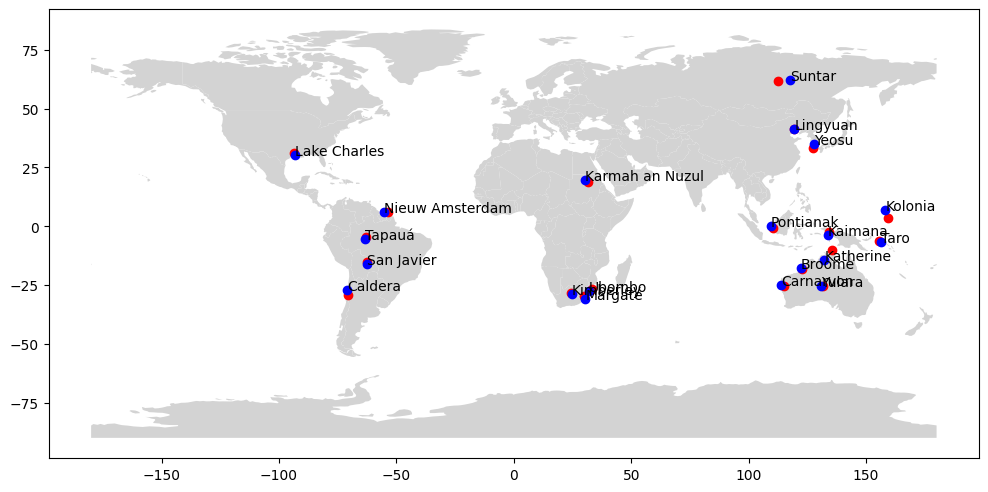

In [ ]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.scatter(rotated_spherical_locations_320[:20,1],
            rotated_spherical_locations_320[:20,0],
            color = "red")
plt.scatter(debiased_locations_spherical[:20,1],
            debiased_locations_spherical[:20,0],
            color = "blue")
for i in range(20):
  plt.annotate(list(debiased_city_names)[i], 
               (debiased_locations_spherical[i,1],
            debiased_locations_spherical[i,0]))
  
plt.savefig("inferred_on_map.png")

In [ ]:
city_country = list();
for i in range(len(list(debiased_country_names))):
  city_country.append(list(debiased_city_names)[i]+", "+list(debiased_country_names)[i])

['Ubombo, South Africa',
 'Lingyuan, China',
 'Broome, Australia',
 'Yeosu, South Korea',
 'Katherine, Australia']

In [ ]:
five_cities_names = pd.Index(city_country[:5])
five_cities_distances =  pd.DataFrame(debiased_city_true_distances[:5,:5].astype(int), index = five_cities_names, columns = list(debiased_city_names)[:5])
five_cities_distances

,Ubombo,Lingyuan,Broome,Yeosu,Katherine
"Ubombo, South Africa",0,11763,9123,12180,10252
"Lingyuan, China",11763,0,6560,1027,6308
"Broome, Australia",9123,6560,0,5860,1139
"Yeosu, South Korea",12180,1027,5860,0,5466
"Katherine, Australia",10252,6308,1139,5466,0


In [ ]:
five_cities_distances_320 =  pd.DataFrame(distances_320[:5,:5].astype(int), index = five_cities_names, columns = list(debiased_city_names)[:5])
five_cities_distances_320

,Ubombo,Lingyuan,Broome,Yeosu,Katherine
"Ubombo, South Africa",0,11590,9026,11917,10672
"Lingyuan, China",11590,0,6639,1155,5938
"Broome, Australia",9026,6639,0,5745,1658
"Yeosu, South Korea",11917,1155,5745,0,4871
"Katherine, Australia",10672,5938,1658,4871,0


In [ ]:
five_cities_distances_80 =  pd.DataFrame(distances_80[:5,:5].astype(int), index = five_cities_names, columns = list(debiased_city_names)[:5])
five_cities_distances_80

,Ubombo,Lingyuan,Broome,Yeosu,Katherine
"Ubombo, South Africa",0,11883,8676,12461,10635
"Lingyuan, China",11883,0,6078,656,5348
"Broome, Australia",8676,6078,0,6115,1961
"Yeosu, South Korea",12461,656,6115,0,5153
"Katherine, Australia",10635,5348,1961,5153,0


In [ ]:
five_cities_distances_20 =  pd.DataFrame(distances_20[:5,:5].astype(int), index = five_cities_names, columns = list(debiased_city_names)[:5])
five_cities_distances_20

,Ubombo,Lingyuan,Broome,Yeosu,Katherine
"Ubombo, South Africa",0,11577,5934,11577,11406
"Lingyuan, China",11577,0,6931,0,3387
"Broome, Australia",5934,6931,0,6931,5522
"Yeosu, South Korea",11577,0,6931,0,3387
"Katherine, Australia",11406,3387,5522,3387,0
